In [1]:
import pandas as pd

nfl_data = pd.read_csv("NFL Play by Play 2009-2017 (v4).csv")

pd.set_option('display.max_columns', None)

toDelete = ['ExPointResult','TwoPointConv','DefTwoPoint','Safety','Onsidekick','Passer','Passer_ID','QBHit','PassLocation','Interceptor','Rusher','Rusher_ID'
,'RunLocation','RunGap','Receiver','Receiver_ID','ReturnResult','Returner','BlockingPlayer','Tackler1','Tackler2','Challenge.Replay','ChalReplayResult'
,'Accepted.Penalty','PenalizedTeam','PenaltyType','PenalizedPlayer','Penalty.Yards','HomeTeam','AwayTeam','Timeout_Indicator','Timeout_Team','posteam_timeouts_pre'
,'HomeTimeouts_Remaining_Pre','AwayTimeouts_Remaining_Pre','HomeTimeouts_Remaining_Post','AwayTimeouts_Remaining_Post','No_Score_Prob','Opp_Field_Goal_Prob'
,'Opp_Safety_Prob','Opp_Touchdown_Prob','Field_Goal_Prob','Safety_Prob','Touchdown_Prob','ExPoint_Prob','TwoPoint_Prob','ExpPts','EPA','airEPA','yacEPA'
,'Home_WP_pre','Away_WP_pre','Home_WP_post','Away_WP_post','Win_Prob','WPA','airWPA','yacWPA','SideofField','sp','PuntResult','RecFumbTeam','RecFumbPlayer'
,'AbsScoreDiff','FieldGoalDistance','TimeUnder','posteam','DefensiveTeam','PlayAttempted','FieldGoalResult','Sack','RushAttempt','PassAttempt','ScoreDiff', 'desc', 'Date', 'GameID', 'Season']

for x in toDelete:
    del nfl_data[x]


C:\Users\dgonz\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (25,51) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
df = nfl_data
df = df.replace({'PassOutcome': {'Incomplete Pass': 0, 'Complete': 1}})
df = df.replace({'PassLength' : {'Short' : 0, 'Deep' : 1}})
df = df.replace({'PlayType' : {'No Play' : 0, 'Pass': 1, 'Sack':2, 'Run':3, 'Punt':4,'Field Goal':5, 'QB Kneel':6, 'Spike':7, 'Kickoff':8, 'Timeout':9,'Half End':10}})
from sklearn.model_selection import train_test_split


features = df[['qtr', 'down',  'yrdline100','ydstogo', 'PlayType', "FirstDown"]]
features = features.dropna()
label = features['FirstDown']
features = features[['qtr', 'down',  'yrdline100','ydstogo', 'PlayType']]

X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.25, random_state=4)


In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
k = 3
my_knn = KNeighborsClassifier(n_neighbors=k)
my_knn.fit(X_train, y_train)
y_predict_kn = my_knn.predict(X_test)
accuracy_kn = accuracy_score(y_test, y_predict_kn)

print("KNN: ", accuracy_kn)

KNN:  0.7345153173119099


In [4]:
from sklearn.tree import DecisionTreeClassifier

my_decisiontree = DecisionTreeClassifier(random_state=5)
my_decisiontree.fit(X_train, y_train)
y_predict_dt = my_decisiontree.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_predict_dt)
print("Decision Tree: ",accuracy_dt)

Decision Tree:  0.7684973566959854


In [5]:
from sklearn.linear_model import LogisticRegression
my_logreg = LogisticRegression()
my_logreg.fit(X_train, y_train)
y_predict_lr = my_logreg.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_predict_lr)
print("Logistic Regression: ",accuracy_lr)


Logistic Regression:  0.7235150171987903


In [6]:
from sklearn.ensemble import RandomForestClassifier
my_RandomForest =RandomForestClassifier(n_estimators = 19, bootstrap = True, random_state=3)
my_RandomForest.fit(X_train,y_train)
y_predict_rf = my_RandomForest.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_predict_rf)
print("Random Forest: ",accuracy_rf)


Random Forest:  0.7667428492277859


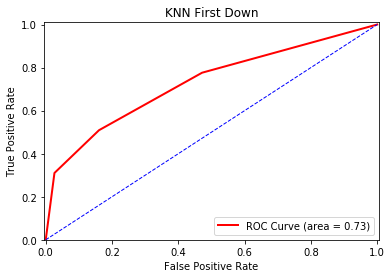

In [7]:
import matplotlib.pyplot as plt
from sklearn import metrics
y_predict_prob_knn = my_knn.predict_proba(X_test)

fpr, tpr, thresholds = metrics.roc_curve(y_test,y_predict_prob_knn[:,1], pos_label=1)
AUC = metrics.auc(fpr, tpr)

%matplotlib inline

plt.figure()

plt.plot(fpr, tpr, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC)

plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN First Down')
plt.legend(loc="lower right")

plt.show()

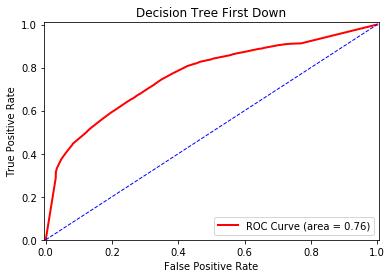

In [8]:
y_predict_prob_dt = my_decisiontree.predict_proba(X_test)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob_dt[:,1], pos_label=1)
AUC = metrics.auc(fpr, tpr)

%matplotlib inline

plt.figure()

plt.plot(fpr, tpr, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC)

plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree First Down')
plt.legend(loc="lower right")

plt.show()

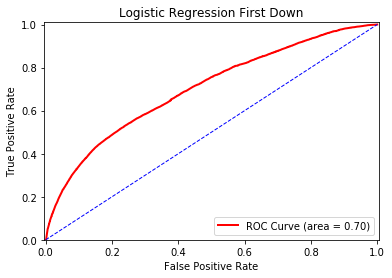

In [9]:
y_predict_prob_lr = my_logreg.predict_proba(X_test)

fpr, tpr, thresholds = metrics.roc_curve(y_test,y_predict_prob_lr[:,1], pos_label=1)
AUC = metrics.auc(fpr, tpr)

%matplotlib inline

plt.figure()

plt.plot(fpr, tpr, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC)

plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression First Down')
plt.legend(loc="lower right")

plt.show()

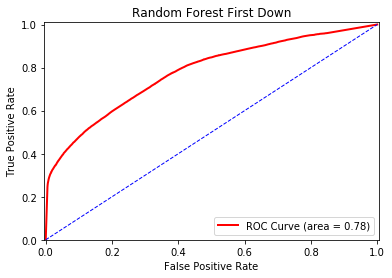

In [10]:
y_predict_prob_rf = my_RandomForest.predict_proba(X_test)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob_rf[:,1], pos_label=1)
AUC = metrics.auc(fpr, tpr)

%matplotlib inline

plt.figure()

plt.plot(fpr, tpr, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC)

plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest First Down')
plt.legend(loc="lower right")

plt.show()